## Problem 1

In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from plotnine import *
plt.style.use('seaborn')

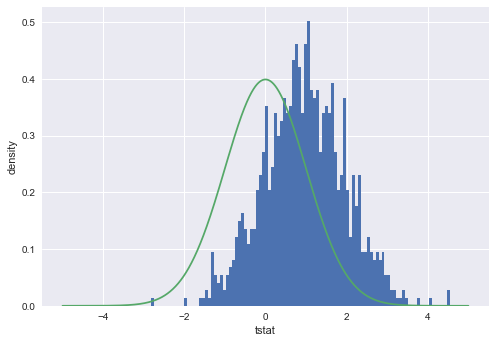

In [2]:
N=500
B=1000
beta1=[]
tstat=[]
np.random.seed(1)
for b in range(B): #range iterates from 0 to 999 here
    x1=np.random.normal(0,1,N) # 1) generate artificial X1
    x2=0.1*x1+np.random.normal(0,1,N) # 1) generate artificial X2
    y=1.1*x1+0.5*x2+np.random.normal(0,1,N) # 2) generate artificial Y
    rho=np.corrcoef(x1,y) # store the correlation
    model = sm.OLS(y, x1) # 3) regress Y on X1
    result = model.fit()
    beta1.append(result.params[0])
    tstat.append((beta1[b]-1.1)/(result.bse[0])) # store the beta_hat and
myhist=plt.hist(tstat,bins=100, density=True)
x_axis = np.arange(-5, 5, 0.001)
mynorm=plt.plot(x_axis, sp.norm.pdf(x_axis,0,1)) # Mean = 0, SD = 1
plt.xlabel('tstat')
plt.ylabel('density')
plt.show()

In [3]:
np.mean(tstat)

0.9519377017652351

In [4]:
np.var(tstat)

0.9946487297018826

### Questions
a) Under what conditions do we have OV bias? Did we design the simulation in a way to produce biased estimates? Why?

We have OV bias when a variable you don't include is correlated with a regressor and the omitted variable is a determinant of the dependent variable. This simulation will produce bias because $X_2$ is correlated with $X_1$ through design and $Y$ is explicitly generated using $X_2$

b) The simulation results in terms of the distribution of $t_1$ and whether you find evidence of OV bias

The distribution of $t_1$ looks normal it has a mean of $.95$ and a variance of $\approx 1$. There is evidence of OV bias because $t_1$ should be distributed similar to $N(0,1)$.

c) What would happen to the plot if we would generate X2 as X2i = ηi instead of using X2i = 0.1X1i +ηi?
Discuss you prediction of what (and why) will happen to the OV bias and test the prediction by plotting
the histogram of t1 together with the standard normal in this new simulation environment.

There won't be OV bias because $X_1$ and $X_2$ are no longer correlated and the histogram will look more like the standard normal distribution.

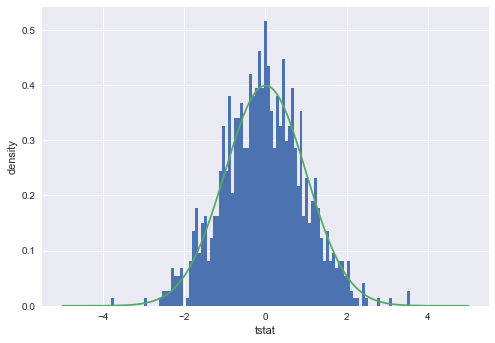

In [5]:
N=500
B=1000
beta1=[]
tstat=[]
np.random.seed(1)
for b in range(B): #range iterates from 0 to 999 here
    x1=np.random.normal(0,1,N) # 1) generate artificial X1
    x2=np.random.normal(0,1,N) # 1) generate artificial X2
    y=1.1*x1+0.5*x2+np.random.normal(0,1,N) # 2) generate artificial Y
    rho=np.corrcoef(x1,y) # store the correlation
    model = sm.OLS(y, x1) # 3) regress Y on X1
    result = model.fit()
    beta1.append(result.params[0])
    tstat.append((beta1[b]-1.1)/(result.bse[0])) # store the beta_hat and
myhist=plt.hist(tstat,bins=100, density=True)
x_axis = np.arange(-5, 5, 0.001)
mynorm=plt.plot(x_axis, sp.norm.pdf(x_axis,0,1)) # Mean = 0, SD = 1
plt.xlabel('tstat')
plt.ylabel('density')
plt.show()

## Problem 2

In [6]:
orig_names = ["Credit_Score","First_Payment _ate","First_Time_Homebuyer", "Maturity_Date",
"MSA","Mortgage_Insurance_Percentage","Number_Units","Occupancy_Status","CLTV",
"DTI","UPB","LTV","Interest_Rate","Channel","Prepayment_Penalty",
"Amortization_Type","State","Property_Type","Postal_Code","Sequence_Number",
"Purpose","Loan_Term","Number_Borrowers","Seller_Name","Servicer_Name",
"Super_Conforming","Pre-HARP_Loan","Program_Indicator","HARP_Indicator",
"Valuation_Method","Interest_Only"]
sample_orig_2003 = pd.read_csv("sample_2003\sample_orig_2003.txt", sep="|", doublequote = False, header = 0, names = orig_names)

In [7]:
sample_orig_2003.head()

,Credit_Score,First_Payment _ate,First_Time_Homebuyer,Maturity_Date,MSA,Mortgage_Insurance_Percentage,Number_Units,Occupancy_Status,CLTV,DTI,...,Loan_Term,Number_Borrowers,Seller_Name,Servicer_Name,Super_Conforming,Pre-HARP_Loan,Program_Indicator,HARP_Indicator,Valuation_Method,Interest_Only
0,751,200303,N,201802,NaN,0,1,P,54,37,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N
1,711,200303,N,201802,49180.0,0,1,P,48,32,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N
2,794,200303,N,203302,NaN,0,1,P,38,21,...,360,1,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N
3,763,200304,N,201803,NaN,0,1,P,78,26,...,180,1,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N
4,789,200304,N,203303,44140.0,0,1,P,65,32,...,360,1,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N


In [8]:
sample_clean = sample_orig_2003.loc[(sample_orig_2003["Interest_Rate"] != 9999) & (sample_orig_2003["Credit_Score"] != 9999) & (sample_orig_2003["DTI"] != 999) & (sample_orig_2003["LTV"] != 999)]

In [9]:
sample_clean.head()

,Credit_Score,First_Payment _ate,First_Time_Homebuyer,Maturity_Date,MSA,Mortgage_Insurance_Percentage,Number_Units,Occupancy_Status,CLTV,DTI,...,Loan_Term,Number_Borrowers,Seller_Name,Servicer_Name,Super_Conforming,Pre-HARP_Loan,Program_Indicator,HARP_Indicator,Valuation_Method,Interest_Only
0,751,200303,N,201802,NaN,0,1,P,54,37,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N
1,711,200303,N,201802,49180.0,0,1,P,48,32,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N
2,794,200303,N,203302,NaN,0,1,P,38,21,...,360,1,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N
3,763,200304,N,201803,NaN,0,1,P,78,26,...,180,1,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N
4,789,200304,N,203303,44140.0,0,1,P,65,32,...,360,1,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N


### 2.1

In [10]:
a = sample_clean.copy()
a["UPB"] = a["UPB"] / 1000
b = a[["State","Interest_Rate", "Credit_Score", "DTI", "UPB", "LTV"]].groupby("State").agg(["mean"])
c = a.groupby("State").size()
b["N"] = c
d = b.sort_values("N", ascending = False)
d = d.set_axis(['IR', 'CS', 'DTI', 'UPB', 'LTV', 'N'], axis = 1)
display(d.head(20).round(3))

,IR,CS,DTI,UPB,LTV,N
State,,,,,,
CA,5.519,733.941,32.030,190.492,58.287,5681
IL,5.517,729.233,30.282,142.608,65.748,2901
FL,5.575,728.977,30.611,131.989,67.287,2896
MI,5.535,731.753,29.552,126.611,64.603,2441
OH,5.528,730.761,30.829,117.328,69.439,2260
NY,5.541,728.369,31.617,162.869,63.530,2197
TX,5.473,722.510,32.628,131.105,71.895,2112
PA,5.481,733.039,29.566,133.565,68.671,1969
MN,5.433,740.381,29.621,145.962,65.514,1866


It seems like within the top 20 states that the variables are very similar. There are differences between states, however there doesn't appear to exist any outliers among the states nor are there any trends.

### 2.2

In [11]:
groups = ["Interest_Rate", "DTI", "UPB", "LTV"]
dat = sample_clean.copy()
dat["High_CS"] = dat["Credit_Score"] >= 740 #Calling scores greater or equal to 740 high
dat[groups + ["High_CS"]].groupby("High_CS").agg(["mean", "std"])

Interest_Rate                  DTI                       UPB  \
                 mean       std       mean        std           mean   
High_CS                                                                
False        5.597449  0.516992  33.205709  12.121716  147977.739869   
True         5.436241  0.484674  27.984259  12.284162  140213.743508   

                            LTV             
                 std       mean        std  
High_CS                                     
False    73008.95007  70.396646  16.194378  
True     71556.01354  62.289413  17.917365

In [12]:
dat_high = dat.query('High_CS == True')
dat_low = dat.query('High_CS == False')
res = sp.ttest_ind(dat_high["LTV"], dat_low["LTV"], equal_var = False)
display(res)

Ttest_indResult(statistic=-52.620149739518624, pvalue=0.0)

In [13]:
res = sp.ttest_ind(dat_high["UPB"], dat_low["UPB"], equal_var = False)
display(res)

Ttest_indResult(statistic=-11.890598986712549, pvalue=1.4689365728937724e-32)

In [14]:
res = sp.ttest_ind(dat_high["DTI"], dat_low["DTI"], equal_var = False)
display(res)

Ttest_indResult(statistic=-47.384652891335016, pvalue=0.0)

In [15]:
res = sp.ttest_ind(dat_high["Interest_Rate"], dat_low["Interest_Rate"], equal_var = False)
display(res)

Ttest_indResult(statistic=-35.59951686232926, pvalue=4.915932671734204e-274)

By the low p-values, it seems that high credit score borrowers are different in all variables under consideration from low credit score borrowers.

## Problem 3
### 3.1

In [16]:
dat2 = sample_clean.copy()
dat2["UPB"] = dat2["UPB"]/1000

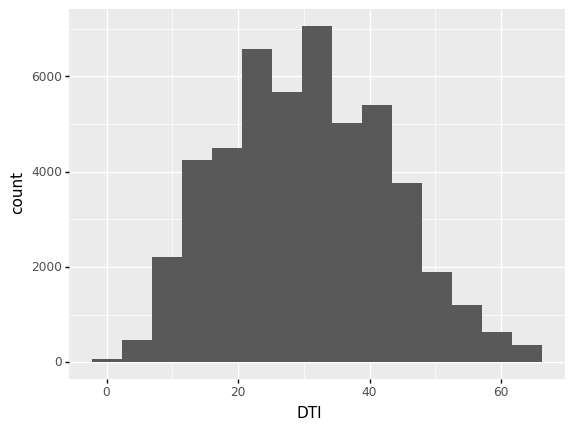

<ggplot: (-9223371901283692136)>

In [29]:
ggplot(dat2, aes("DTI")) + geom_histogram(bins = 15)

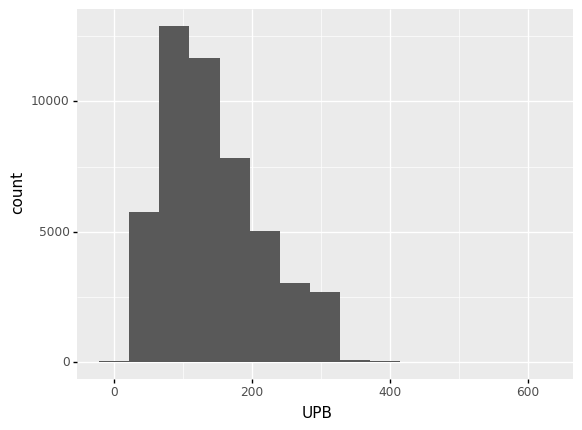

<ggplot: (-9223371901286109544)>

In [18]:
ggplot(dat2, aes("UPB")) + geom_histogram(bins = 15)

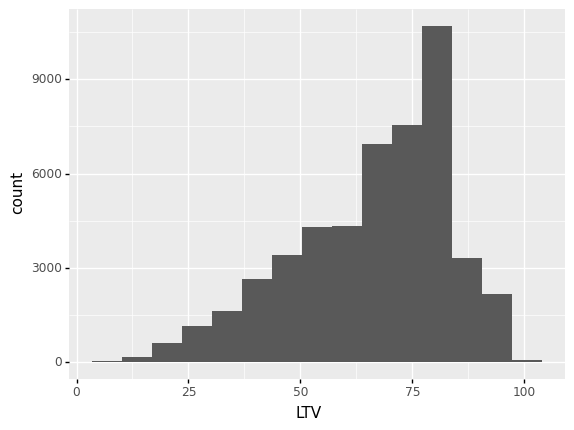

<ggplot: (-9223371901281488336)>

In [19]:
ggplot(dat2, aes("LTV")) + geom_histogram(bins = 15)

DTI seems to be distributed normally, UPB is skewed right while LTV is skewed left. DTI doesn't have any outliers. UPB does have outliers on the right, as shown below. Similarily, LTV has outliers on the left. I would think that DTI and LTV affect the interest rate as they are measures of credit worthiness but UPB shouldn't as it's just the unpaid principle on the loan. 

In [22]:
dat2[["DTI", "UPB", "LTV"]].describe()

,DTI,UPB,LTV
count,49064.000000,49064.000000,49064.000000
mean,30.541986,144.016937,66.260741
std,12.480735,72.374792,17.568749
min,1.000000,10.000000,6.000000
25%,21.000000,88.000000,55.000000
50%,30.000000,130.000000,70.000000
75%,39.000000,186.000000,80.000000
max,65.000000,621.000000,100.000000


In [25]:
dat2["UPB"][dat2["UPB"] > 186 + (186-88)*1.5]

298      344.0
748      342.0
3790     334.0
8198     480.0
9796     337.0
         ...  
48813    334.0
49109    334.0
49917    368.0
49925    350.0
49981    386.0
Name: UPB, Length: 147, dtype: float64

In [27]:
dat2["LTV"][dat2["LTV"] < 70 - (80-55)*1.5]

12       21
66       24
94       26
119      28
126      24
         ..
49944    24
49953    26
49958    21
49977    29
49985    29
Name: LTV, Length: 2465, dtype: int64

### 3.2

In [31]:
dat2[["Credit_Score", "DTI", "UPB", "LTV"]].corr()

,Credit_Score,DTI,UPB,LTV
Credit_Score,1.000000,-0.219499,-0.053455,-0.256967
DTI,-0.219499,1.000000,0.146256,0.178837
UPB,-0.053455,0.146256,1.000000,0.128667
LTV,-0.256967,0.178837,0.128667,1.000000


I don't have concerns for multicollinearity, the correlation between pairs of variables is relatively low.

## Problem 4
### 4.1

In [62]:
model = smf.ols(formula = 'Interest_Rate ~ Credit_Score + DTI + UPB + LTV', data=dat2)
result = model.fit(cov_type = 'HC3')
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest_Rate   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     1313.
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        04:51:48   Log-Likelihood:                -33746.
No. Observations:               49064   AIC:                         6.750e+04
Df Residuals:                   49059   BIC:                         6.755e+04
Df Model:                           4                                         
Covariance Type:                  HC3                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.8729      0.039    150.278      0.000       5.796       5.949
Credit_Score    -0.0012   4.75e-05    -24.846      0.000      -0.001      -0.001
DTI              0.0028      0.000     15.201      0.000       0.002       0.003
UPB             -0.0003   3.04e-05    -10.249      0.000      -0.000      -0.000
LTV              0.0070      0.000     53.066      0.000       0.007       0.007
==============================================================================
Omnibus:                       24.219   Durbin-Watson:                   0.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.240
Skew:                           0.054   Prob(JB):                     5.45e-06
Kurtosis:                       3.005   Cond. No.                     1.29e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Ceterus paribus, when you increase credit score by $1$, the interest rate decreases by $.0012$
* The signs of of DTI, UPB, LTV do make sense. When the ratios are higher, the rates should go up.
* From the tables above, you can see that the p-values are all $0$ so they are all statistically significant at the $5\%$ level
* The $R^2$ of the multiple regression is higher than that of the single variable regression, no matter adjusted or not. So, I would consider the multiple regression more accurate
* The coefficient of credit score changed by $.07$, which is a large movement relative to its original value. 

In [61]:
model2 = smf.ols(formula = 'Interest_Rate ~ Credit_Score', data=dat2)
result2 = model2.fit(cov_type = 'HC3')
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest_Rate   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1741.
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        04:51:44   Log-Likelihood:                -35389.
No. Observations:               49064   AIC:                         7.078e+04
Df Residuals:                   49062   BIC:                         7.080e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.9311      0.034    202.911      0.000       6.864       6.998
Credit_Score    -0.0019   4.64e-05    -41.727      0.000      -0.002      -0.002
==============================================================================
Omnibus:                       62.703   Durbin-Watson:                   0.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.873
Skew:                           0.086   Prob(JB):                     2.22e-14
Kurtosis:                       2.966   Cond. No.                     1.07e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.2
In the output below you can see that the test resulted in a p-value of $0$, so you can reject the hypothesis at the $5\%$ signifiance level.

In [65]:
hypotheses = '(DTI = 0), (UPB = 0), (LTV = 0)'
ftest = result.f_test(hypotheses)
fstat = ftest.statistic[0][0]
fpval = ftest.pvalue
print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

fstat: 1109.919635893624

fpval: 0.0



### 4.3

In [66]:
model3 = smf.ols(formula = 'Interest_Rate ~ Credit_Score + DTI + UPB + LTV + State', data=dat2)
result3 = model3.fit(cov_type = 'HC3')
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest_Rate   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     114.0
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        04:56:31   Log-Likelihood:                -33265.
No. Observations:               49064   AIC:                         6.664e+04
Df Residuals:                   49007   BIC:                         6.715e+04
Df Model:                          56                                         
Covariance Type:                  HC3                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.7497      0.057    100.959      0.000       5.638       5.861
State[T.AL]     -0.0818      0.047     -1.733      0.083      -0.174       0.011
State[T.AR]     -0.0296      0.053     -0.558      0.577      -0.133       0.074
State[T.AZ]      0.1405      0.044      3.212      0.001       0.055       0.226
State[T.CA]      0.1678      0.041      4.046      0.000       0.087       0.249
State[T.CO]      0.1055      0.043      2.430      0.015       0.020       0.191
State[T.CT]      0.1094      0.046      2.394      0.017       0.020       0.199
State[T.DC]      0.3408      0.077      4.417      0.000       0.190       0.492
State[T.DE]      0.0882      0.055      1.593      0.111      -0.020       0.197
State[T.FL]      0.1178      0.042      2.808      0.005       0.036       0.200
State[T.GA]     -0.0326      0.043     -0.758      0.448      -0.117       0.052
State[T.GU]      0.5818      0.168      3.470      0.001       0.253       0.910
State[T.HI]      0.0454      0.062      0.727      0.467      -0.077       0.168
State[T.IA]      0.0031      0.045      0.069      0.945      -0.085       0.091
State[T.ID]      0.0160      0.049      0.325      0.745      -0.081       0.113
State[T.IL]      0.0786      0.042      1.879      0.060      -0.003       0.161
State[T.IN]      0.0621      0.043      1.440      0.150      -0.022       0.147
State[T.KS]      0.0530      0.047      1.131      0.258      -0.039       0.145
State[T.KY]      0.0087      0.045      0.194      0.846      -0.079       0.096
State[T.LA]     -0.0219      0.051     -0.428      0.669      -0.122       0.078
State[T.MA]      0.1608      0.043      3.701      0.000       0.076       0.246
State[T.MD]      0.1269      0.043      2.953      0.003       0.043       0.211
State[T.ME]      0.0703      0.052      1.347      0.178      -0.032       0.173
State[T.MI]      0.1023      0.042      2.435      0.015       0.020       0.185
State[T.MN]      0.0132      0.042      0.313      0.755      -0.070       0.096
State[T.MO]      0.1001      0.044      2.297      0.022       0.015       0.185
State[T.MS]      0.0366      0.067      0.551      0.582      -0.094       0.167
State[T.MT]     -0.0089      0.056     -0.160      0.873      -0.118       0.100
State[T.NC]     -0.0535      0.043     -1.240      0.215      -0.138       0.031
State[T.ND]     -0.1414      0.064     -2.219      0.026      -0.266      -0.017
State[T.NE]      0.0307      0.047      0.649      0.516      -0.062       0.123
State[T.NH]      0.1187      0.049      2.433      0.015       0.023       0.214
State[T.NJ]      0.1601      0.043      3.746      0.000       0.076       0.244
State[T.NM]      0.1305      0.053      2.475      0.013       0.027       0.234
State[T.NV]      0.1407      0.046      3.082      0.002       0.051       0.230
State

* The coefficient for VT is .1541 which means that the interest rate is on average .1541 higher in VT than the state used as the baseline (the one that's not used as a dummy, which seems to be Alaska). The coefficient for AL is -0.0818 which means that the interest rate is on average .0818 lower in AL than the state used as the baseline.
* Compared to the original multiple regression model, the coefficient of credit_score didn't significantly change. Nor did DTI, UPB, and LTV significantly change in absolute terms. This may be because the state isn't a great predictor of interest rate and that state isn't correlated with any of the other variables.